# БИЗНЕС-КЕЙС "СТРИМЧИКА"

# Интернет-магазин "Стримчик" - площадка, которая продаёт по всему миру компьютерные игры. В данном проекте нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Примерным планом действий будет являться, в первую очередь, исследование обработка имеющихся данных таким образом, чтобы это было максимально наглядно и удобно в использовании. Далее будет самый интересный этап, а именно анализ и вычисление тех самых закономерностей в данных (в нашем случае в играх и различных регионах). Важно будет отсеять неактуальные жанры и платформы для производства игр, ведь как бы ни были успешны некоторые платформы и проекты в далеком двухтысячном, технологии не стоят на месте, рынок развивается, а пользователи вместе с ним. Итого нам нужно будет составить портрет современного рынка, как в сфере пользователя, так и в сфере региона этого пользователя и его предпочтений в заивисмости от этого самого региона. 

## Первое знакомство с данными

### Импорт всех нужных библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp

### Подгружаем данные и смотрим впервые

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Видим такие столбцы, как: Name (имя), Platform (вид консоли), Year_of_Release (год релиза), Genre (жанр), NA_sales (продажи в северной америке), EU_sales (продажи в европе), JP_sales (продажи в Японии), Other_sales (продажи в остальных регионах), Critic_Score (оценка критиков), User_Score (оценка пользователя), Rating (возрастная категория)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.shape

(16715, 11)

Как мы можем видеть, есть большое количество пропусков в: Critic_Score, User_Score, Rating.
P.S. максимальное количество значений в столбце - 16715

## Подготовка данных

### Пофиксим кривые названия столбцов

In [6]:
data.head(1)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [7]:
data.columns = data.columns.str.lower()

Приводим имена всех столбцов к нижнему регистру

In [8]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Готово, все имена теперь удобно читать и использовать

### Изучим и изменим типы данных в столбцах

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


#### Очевидно что год выпуска всегда целое число

In [11]:
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release'] = data['year_of_release'].astype(int)

Удалим игры у которых неизвестен год выпуска и приведем значения в столбце к int

In [12]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E


#### Изменим значения в столбце critic_score

In [13]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Тут менять ничего не будем, так как пропущенные значения мы не можем заменить

#### Изменим значения в столбце user_score

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Для удобства преобразуем "tbd" и "nan" в NaN, так как tbd означает, что оценки либо нет, либо она ожидается

In [15]:
data['user_score'].replace('tbd', np.nan, inplace=True)
data['user_score'].replace('nan', np.nan, inplace=True)

In [16]:
data['user_score'] = data['user_score'].astype(float)

Так как пользователи могут ставить нецелую оценку, приведем столбец к флоату

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Обработаем пропуски в данных

#### Будем идти по порядку, удалим две записи у которых нет имени

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [19]:
data = data.dropna(subset=['name'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Первые 7 столбцов стали иметь одинаковое количество значений, это хорошо

#### Обработаем пропуски в столбце critic_score

In [21]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Кажется, будто в этом столбце есть смысл заменить пропуски на среднюю оценку критиков по жанру

#### Столбец rating

Кажется, этот столбец трогать не стоит так как эта оценка не зависит от пользователей либо критиков, она ставится за содержание в игре тех или иных механик (а-ля уб*йства)

### Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец

In [22]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E


In [23]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [24]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


Таким образом мы добавили дополнительный столбец, который отражает сумму прибыли для трех регионов и получается суммарная продажа игры

## Исследовательский анализ данных

P.S. В УСЛОВИИ СКАЗАНО ЧТО ДАННЫЕ ЗА 2016 ГОД МОГУТ БЫТЬ НЕ ПОЛНЫМИ

### Статистика по выпуску игр в разные годы

Создадим сводную таблицу, сгруппируем игры по годам и получим размер каждой группы, дадим столбцу название release_count

In [25]:
pivot_table = data.groupby('year_of_release').size().reset_index(name='release_count')

In [26]:
pivot_table.tail(5)

,year_of_release,release_count
32,2012,653
33,2013,544
34,2014,581
35,2015,606
36,2016,502


Просто вывел для наглядности чтобы убедиться что современное время присутствует в таблице

Построим барплот по нашей таблице

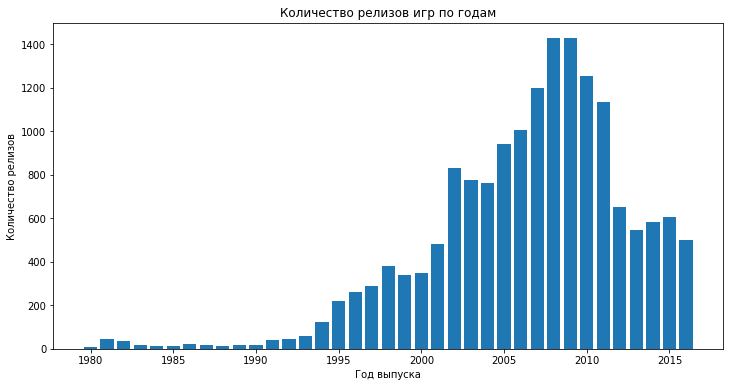

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(pivot_table['year_of_release'], pivot_table['release_count'])
plt.title('Количество релизов игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.show()

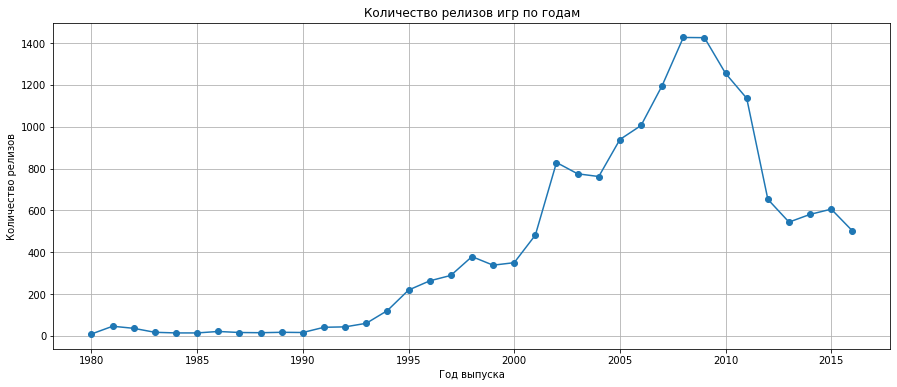

In [28]:
plt.figure(figsize=(15, 6))
plt.plot(pivot_table['year_of_release'], pivot_table['release_count'], marker='o', linestyle='-')
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.title('Количество релизов игр по годам')
plt.grid(True)
plt.show()

### Наглядная статистика продаж самых популярных платформ по годам

In [29]:
platform_sales = data.groupby('platform')['total_sales'].sum().reset_index()
platform_sales.sort_values(by='total_sales', ascending=False)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


In [30]:
plt_list = data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).head(21).index.to_list()

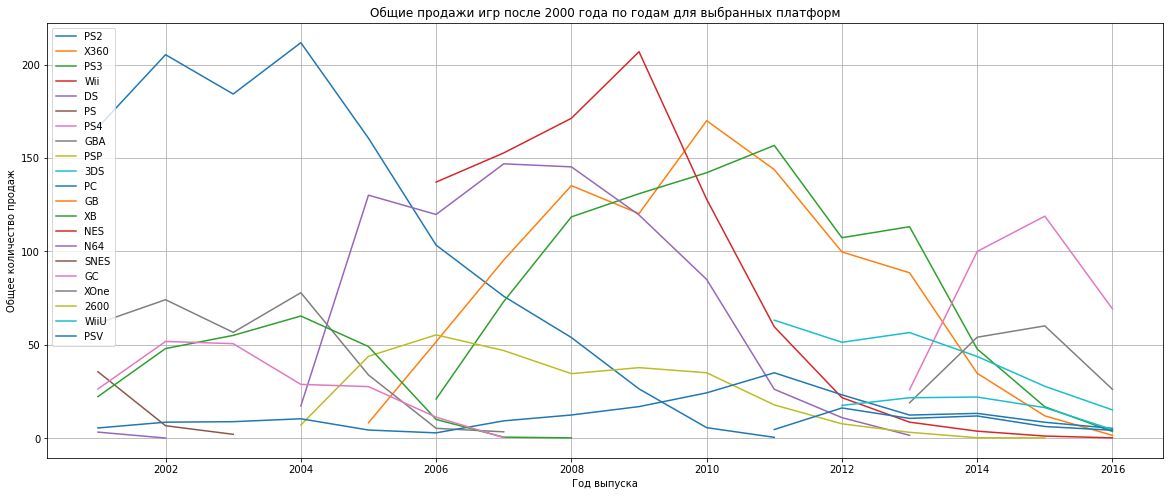

In [31]:
selected_platforms = plt_list

# Фильтруем чтобы были только эти платформы и год выпуска от 2000

filtered_df = data[(data['platform'].isin(selected_platforms)) & (data['year_of_release'] > 2000)]

# Группируем данные по платформам и годам, суммируем продажи

platform_sales = filtered_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
plt.figure(figsize=(20, 8))
for platform in selected_platforms:
    platform_data = platform_sales[platform_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)
plt.title('Общие продажи игр после 2000 года по годам для выбранных платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Общее количество продаж')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

Как мы можем видеть среднее время жизни платформы 7-8 лет. Правая граница интересующего нас периода 2016 год, значит левая пусть будет 2014

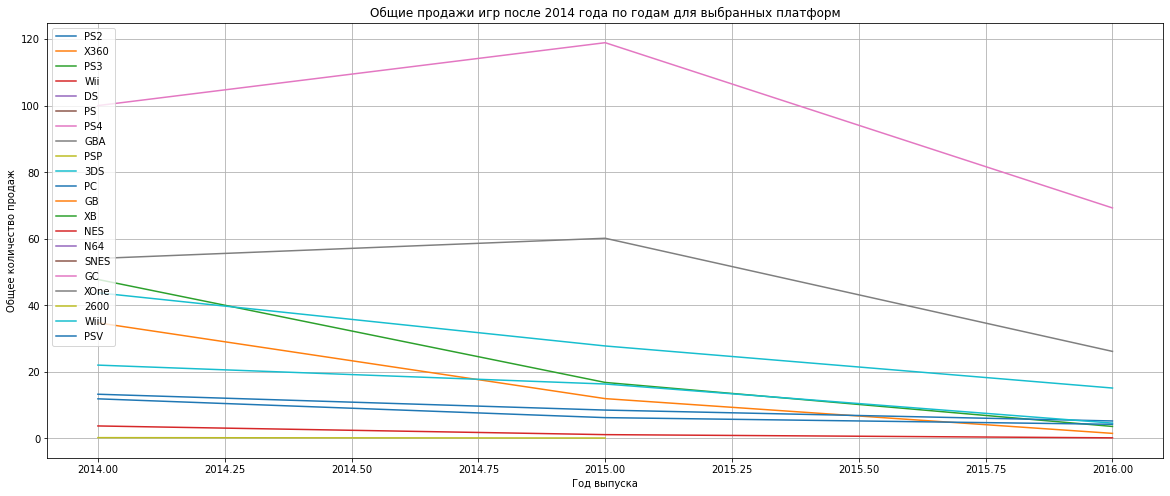

In [32]:
selected_platforms = plt_list

# Фильтруем чтобы были только эти платформы и год выпуска от 2014

filtered_df = data[(data['platform'].isin(selected_platforms)) & (data['year_of_release'] >= 2014)]

# Группируем данные по платформам и годам, суммируем продажи

platform_sales = filtered_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
plt.figure(figsize=(20, 8))
for platform in selected_platforms:
    platform_data = platform_sales[platform_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)
plt.title('Общие продажи игр после 2014 года по годам для выбранных платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Общее количество продаж')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

ИТОГО ИМЕЕМ СЛЕДУЮЩИЕ ПЛАТФОРМЫ К ДАЛЬНЕЙШЕМУ РАССМОТРЕНИЮ: PC, PSV, PS4, 3DS, XOne. А ПЕРИОД РАССМОТРЕНИЯ 2014-2016.

<div class="alert alert-block alert-info">
<b>ВИДИМ ТО, ЧТО ОТВАЛИЛОСЬ МНОГО ПЛАТФОРМ КОТОРЫЕ ПОМЕРЛИ ЕЩЕ ДО 2014</b> 
</div>

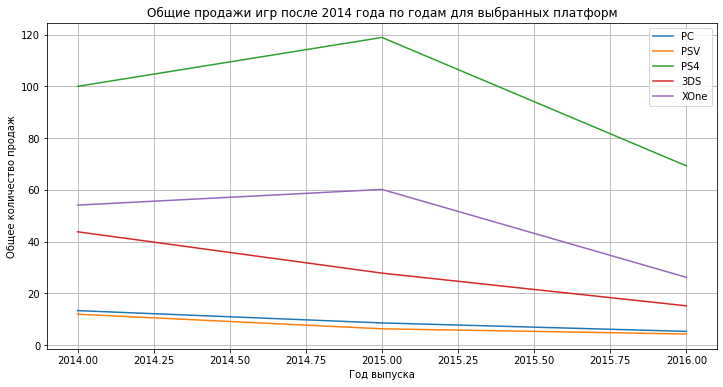

In [33]:
selected_platforms = ['PC', 'PSV', 'PS4', '3DS', 'XOne']

# Фильтруем чтобы были только эти платформы и год выпуска от 2014

filtered_df = data[(data['platform'].isin(selected_platforms)) & (data['year_of_release'] >= 2014)]

# Группируем данные по платформам и годам, суммируем продажи

platform_sales = filtered_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
for platform in selected_platforms:
    platform_data = platform_sales[platform_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)
plt.title('Общие продажи игр после 2014 года по годам для выбранных платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Общее количество продаж')
plt.grid(True)
plt.legend()
plt.show()

В целом да, так и оказалось. Эти платформы являются самыми актуальными. Безусловно у нас есть ТОП-3, который состоит из PS4, XOne, 3DS, однако например PC будет странно отстранять, так как она никогда не перестанет быть популярной, НО проблема пиратства тоже никуда не денется. 

Можем видеть что в своем время огромный хайп набрала PS4 однако так же быстро и покатилась внизу, видимо расцвет PC наступил с появлением хорошего интернета однако потом люди додумались до пиратства. 3DS просто катится вниз, а XOne потерпел то же самое, что и PS4, однако глобально был менее успешен. Если брать во внимание предыдущие графики то GC имел большую популярность в нулевых, PSV и WiiU плавно катились вниз, однако были довольно стабильны. XB, GBA резко потухли к 2006, а PS к 2002. PS2 была супер популярна в 2002-2004, DS и Wii 2006-2010, PS3 и X360 были конкурентами и были реально популярными, как вместе поднялись, так вместе и упали, пик успеха в 2010. 

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

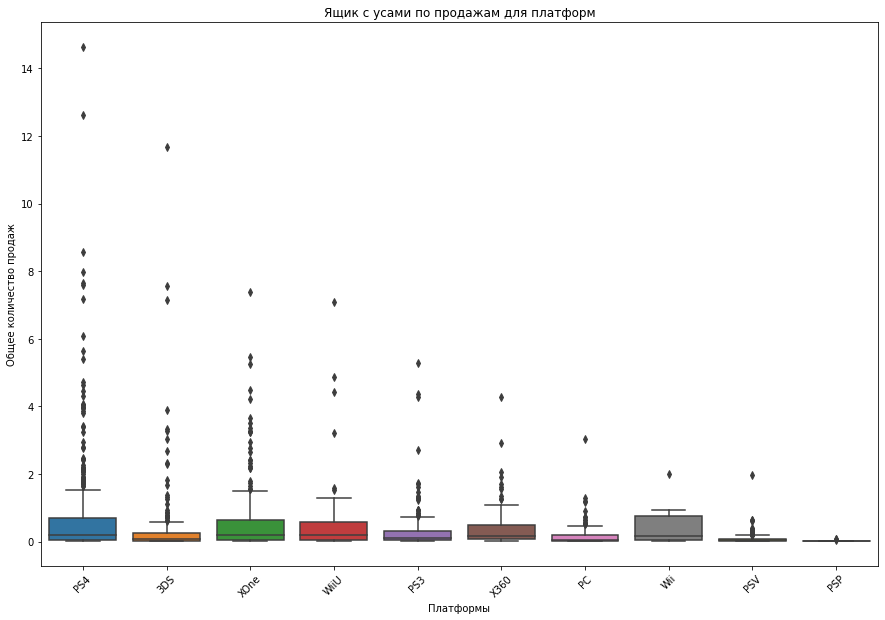

In [34]:
df_filtered = data[data['year_of_release'] >= 2014]
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_filtered, x='platform', y='total_sales')
plt.title('Ящик с усами по продажам для платформ')
plt.xlabel('Платформы')
plt.ylabel('Общее количество продаж')
plt.xticks(rotation=45) 
plt.show()

Можно заметить большое количество выбросов, так как скорее всего игр выпускается огромное множество, на разные бюджеты, жанры и тд, а выстреливают только несколько из-за которых образуется такое большое количество выбросов. 

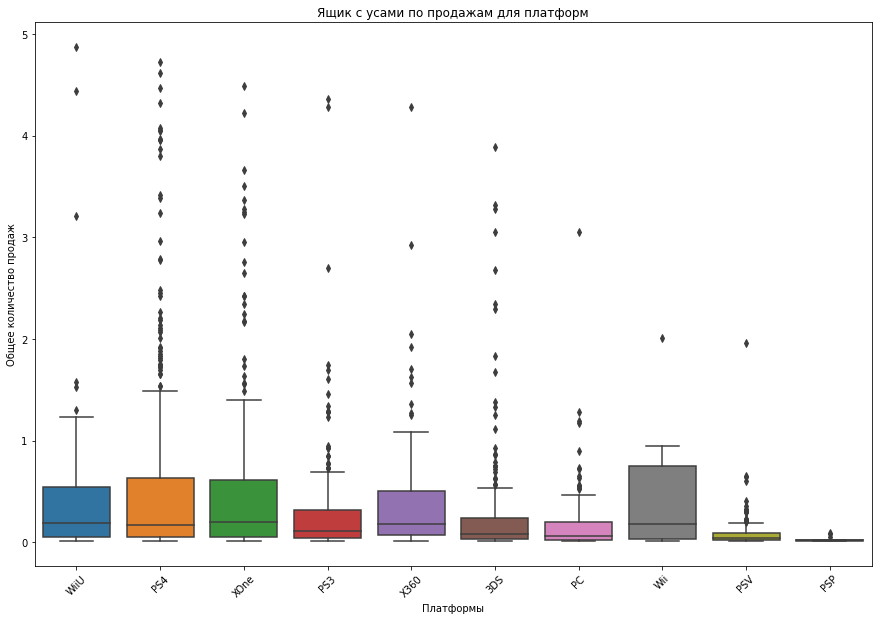

In [35]:
df_filtered = data[(data['year_of_release'] >= 2014) & (data['total_sales'] <= 5)]
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_filtered, x='platform', y='total_sales')
plt.title('Ящик с усами по продажам для платформ')
plt.xlabel('Платформы')
plt.ylabel('Общее количество продаж')
plt.xticks(rotation=45) 
plt.show()

Можно заметить что во всех ящиках медиана снизу, она стремится к нижнему значению. Самые длинные усы как раз по сути у выбранных нами платформ, как и сами ящики

### Диаграмма рассеяния и корреляция между отзывами и продажами

К примеру выберем PS4

Построим диаграмму рассеяния для зависимости продаж от оценок пользователей

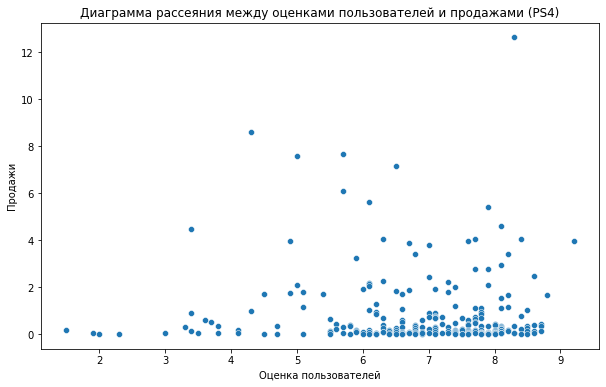

In [36]:
ps4_data = data[(data['platform'] == 'PS4') & (data['year_of_release'] >= 2014)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data)
plt.title('Диаграмма рассеяния между оценками пользователей и продажами (PS4)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

Найдем корреляцию между оценками пользователей и продажами

In [37]:
ps4_data['user_score'].corr(ps4_data['total_sales'])

-0.040131589472697356

Как мы можем видеть она хоть и обратная, однако ничтожная

Построим диаграмму рассеяния для зависимости продаж от оценок критиков

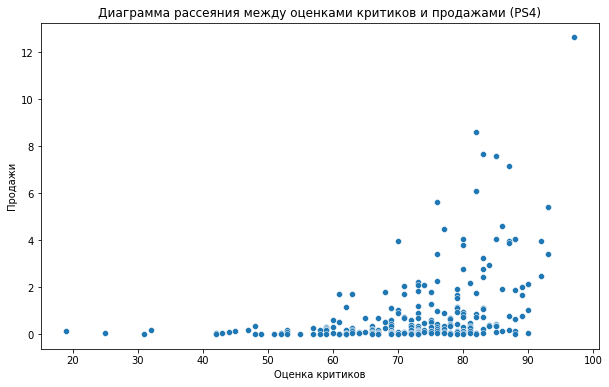

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data)
plt.title('Диаграмма рассеяния между оценками критиков и продажами (PS4)')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

Найдем корреляцию между оценками критиков и продажами

In [39]:
ps4_data['critic_score'].corr(ps4_data['total_sales'])

0.40266141068104083

Как мы можем видеть зависимость довольно сильная и прямопропорциональная

Теперь проверим это на нескольких других платформах

Построим диаграмму рассеяния для зависимости продаж от оценок пользователей

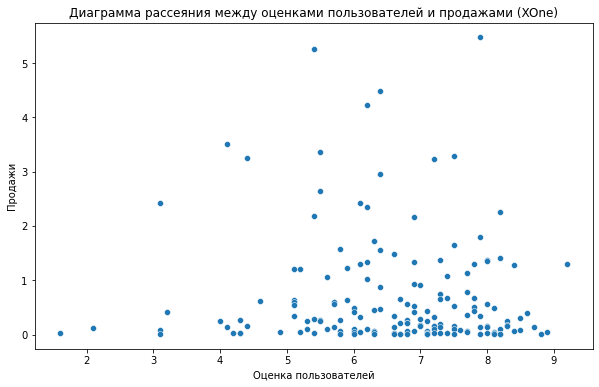

In [40]:
xone_data = data[(data['platform'] == 'XOne') & (data['year_of_release'] >= 2014)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=xone_data)
plt.title('Диаграмма рассеяния между оценками пользователей и продажами (XOne)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

Найдем корреляцию между оценками пользователей и продажами

In [41]:
xone_data['user_score'].corr(xone_data['total_sales'])

-0.0703839280647581

Ситуация аналогична PS4

Построим диаграмму рассеяния для зависимости продаж от оценок критиков

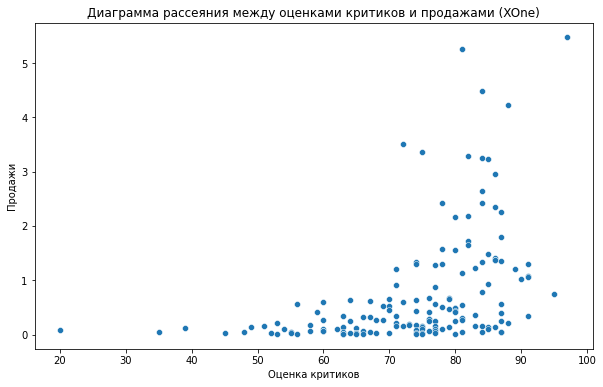

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=xone_data)
plt.title('Диаграмма рассеяния между оценками критиков и продажами (XOne)')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

Найдем корреляцию между оценками критиков и продажами

In [43]:
xone_data['critic_score'].corr(xone_data['total_sales'])

0.42867694370333226

Тут тоже ситуация похожая, есть зависимость между оценками критиков и продажами

Проверим еще для какой-нибудь платформы, пусть это будет 3DS

Построим диаграмму рассеяния для зависимости продаж от оценок пользователей

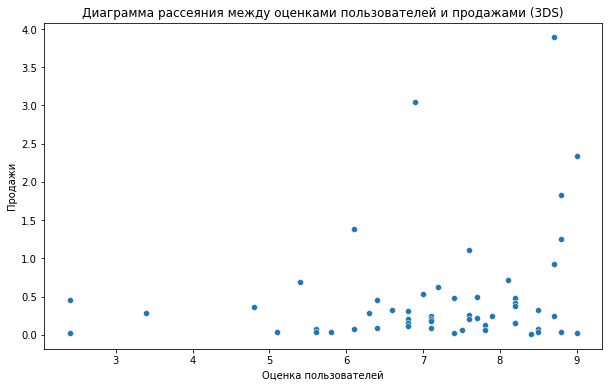

In [44]:
tds_data = data[(data['platform'] == '3DS') & (data['year_of_release'] >= 2014)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=tds_data)
plt.title('Диаграмма рассеяния между оценками пользователей и продажами (3DS)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

Найдем корреляцию между оценками пользователей и продажами

In [45]:
tds_data['user_score'].corr(tds_data['total_sales'])

0.2151932718527028

Тут уже ситуация другая, есть небольшая прямопропорциональная зависимость

Построим диаграмму рассеяния для зависимости продаж от оценок критиков

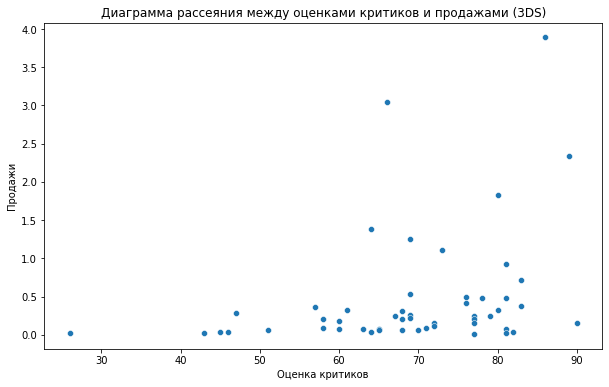

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=tds_data)
plt.title('Диаграмма рассеяния между оценками критиков и продажами (3DS)')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

Найдем корреляцию между оценками критиков и продажами

In [47]:
tds_data['critic_score'].corr(tds_data['total_sales'])

0.314117492869051

Тут тоже ситуация в целом похожая, но зависимость меньше

Итого кажется, будто оценки пользователей совсем никак не влияют на продажи игр, а оценки критиков влияют, но сильнее всего они влияют на самые современные платформы, на более старые поменьше. 

### Общее распределение игр по жанрам

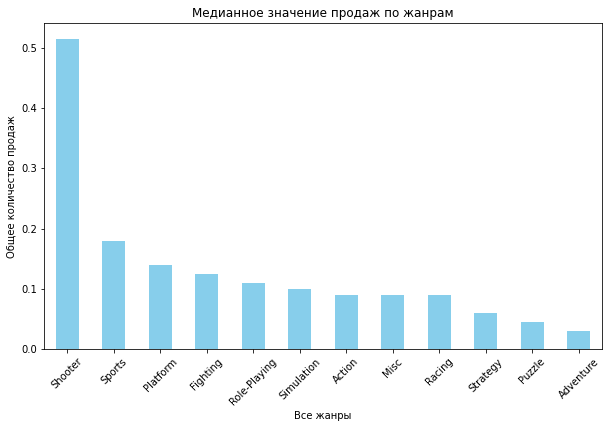

In [48]:
actual_data = data[data['year_of_release'] >= 2014]
genre_sales = actual_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Медианное значение продаж по жанрам')
plt.xlabel('Все жанры')
plt.ylabel('Общее количество продаж')
plt.xticks(rotation=45)
plt.show()

В целом наглядно видно, что самый "богатый" жанр это шутер, что не удивительно, на втором месте наравне спортивные игры и платформеры, так как любителей FIFA и так далее просто огромное множество, не то чтобы между соседними жанрами пропасть, однако разница видна, особенно между первым и всеми остальными местами

## Примерное составление портрета пользователя для каждого региона

### Рассмотрим платформы

Сгруппируем данные по платформам.

In [49]:
actual_data = data[data['year_of_release'] >= 2014]
grouped = actual_data.groupby('platform').sum()

Посчитаем сумму продаж для каждой платформы в каждом регионе. Отсортируем результаты по убыванию для каждого региона. Выберем ТОП-5 Платформ для каждого региона. 

In [50]:
na_top_platforms = grouped['na_sales'].sort_values(ascending=False).head(5)
eu_top_platforms = grouped['eu_sales'].sort_values(ascending=False).head(5)
jp_top_platforms = grouped['jp_sales'].sort_values(ascending=False).head(5)

Создадим функцию которая будет строить piechart для нужной нам страны

In [51]:
def plot_pie_chart(top_platforms, title):
    plt.figure(figsize=(8, 8))
    plt.pie(top_platforms, labels=top_platforms.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(title)
    plt.show()

Изучим Северную Америку

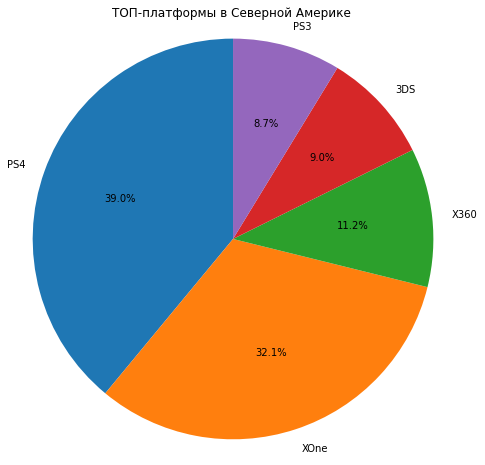

In [52]:
plot_pie_chart(na_top_platforms, 'ТОП-платформы в Северной Америке')

Абсолютный победитель в Америке PS4, на втором месте Xbox One

Изучим Европу

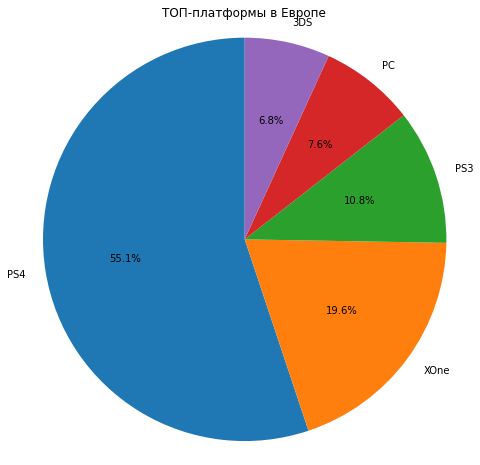

In [53]:
plot_pie_chart(eu_top_platforms, 'ТОП-платформы в Европе')

Также ожидаемо было, что в европе это наоборот будет PS4, а второе место за Xbox One

Изучим Японию

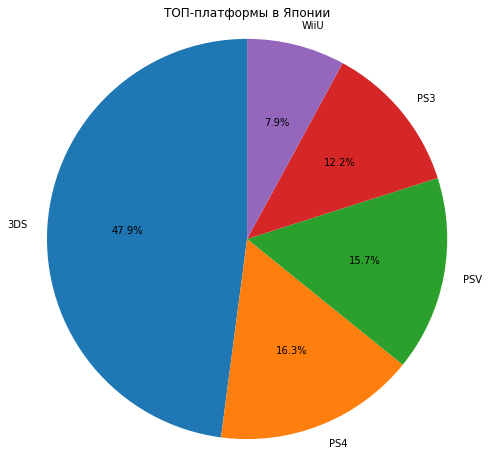

In [54]:
plot_pie_chart(jp_top_platforms, 'ТОП-платформы в Японии')

А Японцы в свою очередь все так же любят аутентичные консольки, но и про PlayStation не забывают

### Рассмотрим жанры

Сгруппируем данные по жанру

In [55]:
actual_data = data[data['year_of_release'] >= 2014]
grouped = actual_data.groupby('genre').sum()

Посчитаем сумму продаж для каждого жанра в каждом регионе. Отсортируем результаты по убыванию для каждого региона. Выберем ТОП-5 жанров для каждого региона

In [56]:
na_top_genres = grouped['na_sales'].sort_values(ascending=False).head(5)
eu_top_genres = grouped['eu_sales'].sort_values(ascending=False).head(5)
jp_top_genres = grouped['jp_sales'].sort_values(ascending=False).head(5)

Создадим функцию аналогичную платформам

In [57]:
def plot_pie_chart(top_genres, title):
    plt.figure(figsize=(8, 8))
    plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(title)
    plt.show()

Изучим Северную Америку

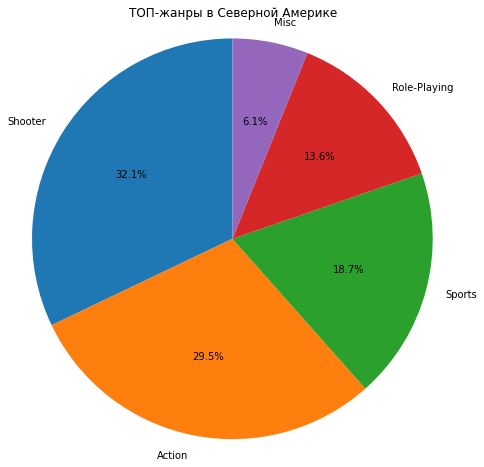

In [58]:
plot_pie_chart(na_top_genres, 'ТОП-жанры в Северной Америке')

Таким образом в Северной Америке с хорошим отрывом побеждают игры жанра Шутер, но и, ожидаемо, в топе находятся экшены и спортивные игры

Изучим Европу

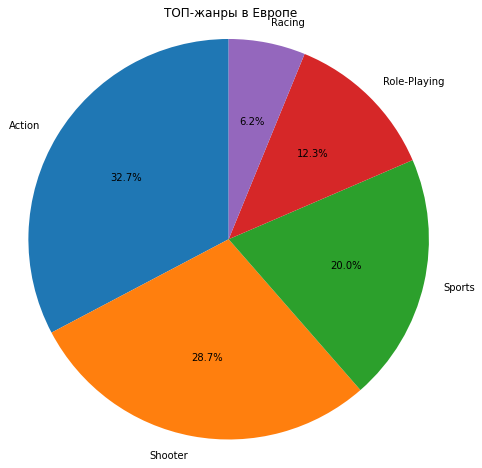

In [59]:
plot_pie_chart(eu_top_genres, 'ТОП-жанры в Европе')

В Европе ТОП-3 те же самые жанры, однако Экшены тут побеждают

Изучим Японию

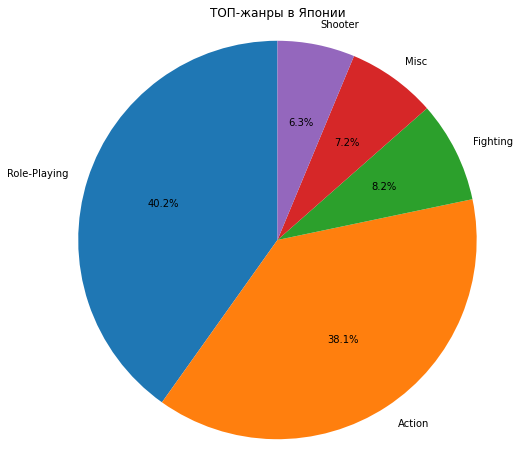

In [60]:
plot_pie_chart(jp_top_genres, 'ТОП-жанры в Японии')

В Японии, ожидаемо, на первом месте role-play игры, однако второе место за Экшенами

### Проверка влияния рейтинга

Заменим отстутсвующие рейтинги на NO и построим барплот по медианным продажам и рейтингу

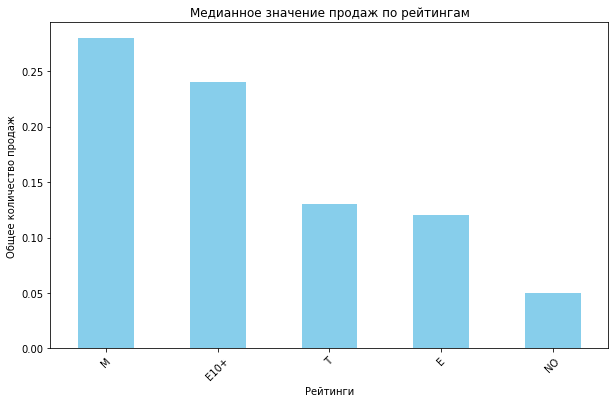

In [61]:
data['rating'].fillna('NO', inplace=True)
actual_data = data[data['year_of_release'] >= 2014]
esrb_sales = actual_data.groupby('rating')['total_sales'].median().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
esrb_sales.plot(kind='bar', color='skyblue')
plt.title('Медианное значение продаж по рейтингам')
plt.xlabel('Рейтинги')
plt.ylabel('Общее количество продаж')
plt.xticks(rotation=45)
plt.show()

Таким образом получаем, что на первом месте по продажам игры для взрослых, рассчитанные на взрослую аудиторию, на втором месте игры для людей от 10 лет. Получается, что рейтинг влияет на продажи, так как рассчитан на разные аудитории

## Проверка гипотез

### Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сначала получим рейтинги для двух платформ

In [62]:
xbox_one_user_scores = data[(data['platform'] == 'XOne') & (data['year_of_release'] >= 2014)]['user_score'].dropna()
pc_user_scores = data[(data['platform'] == 'PC') & (data['year_of_release'] >= 2014)]['user_score'].dropna()

Проведем t-test, за альфа по старинке выберу значение 0.05

Нулевой гипотезой будет то, что средние пользовательские рейтинги для платформ Xbox One и PC статистически не имеют отличий. Альтернативная: Средние пользовательские рейтинги для платформ Xbox One и PC различаются. 

In [63]:
alpha = 0.05

statistic, pvalue = ttest_ind(xbox_one_user_scores, pc_user_scores, equal_var=False)

if pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги различаются.")
else:
    print("Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.")

Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.


ПОДЫТОЖИМ: 1) Нулевой гипотезой было то, что средние пользовательские рейтинги для платформ Xbox One и PC одинаковы. Альтернативная: Средние пользовательские рейтинги для платформ Xbox One и PC различаются. 2) Я выбрал именно такой вид т-теста так как он для двух незавиисимых выборок. 

### Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные.

Сначала получим только те данные которые соотвествуют этим двум жанрам

In [64]:
action_user_scores = data[(data['genre'] == 'Action') & (data['year_of_release'] >= 2014)]['user_score'].dropna()
sports_user_scores = data[(data['genre'] == 'Sports') & (data['year_of_release'] >= 2014)]['user_score'].dropna()

Проведем t-test, за альфа по старинке выберу 0.05

Нулевой гипотезой будет то, что средние пользовательские рейтинги для жанров Action и Sports статистически не имеют отличий. Альтернативная: Средние пользовательские рейтинги для жанров Action и Sports разные.

In [65]:
alpha = 0.05

statistic, pvalue = ttest_ind(action_user_scores, sports_user_scores, equal_var=False)

if pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги различаются для жанров Action и Sports.")
else:
    print("Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги статистически не имеют отличий для жанров Action и Sports.")

Отвергаем нулевую гипотезу: Средние пользовательские рейтинги различаются для жанров Action и Sports.


ПОДЫТОЖИМ: 1) Нулевой гипотезой было то, что средние пользовательские рейтинги для жанров Action и Sports одинаковы. Альтернативная: Средние пользовательские рейтинги для жанров Action и Sports разные. 2) Я выбрал именно такой вид т-теста так как он для двух незавиисимых выборок.

## ВЫВОДЫ

# В данном проекте мы исследовали рынок компьютерных игр на примере интернет-магазина "Стримчик". В нашем распоряжении было довольно большое количество данных о множестве игр. Например, год выпуска игры, жанр игры, для какой платформы она была выпущена, информация о том, как её оценивали пользователи, критики, а так же международная организация, которая выдает играм соотвествующий возрастной рейтинг (и не только возрастной). Конечно же не обошлось без данных о том, какой экономический вклад они внесли в разные регионы мира. Конкретно мы рассматривали три региона: Северная Америка, Европа и Япония. В процессе нашего исследования мы уделили огромное количество внимания данным, а именно подготовке этих данных к анализу, например, заполняли пропуски там, где это стоило сделать (к примеру это может быть рейтинг, так как похожие по сути игры зачастую имеют похожий рейтинг). Однако, не забываем про рейтинг ESRB, его мы увы не сможем предугадать, так как он зависит от этой организации а не от, например, пользователей. Важной частью подготовки данных стал подсчет общей прибыли во всем регионам, так как это дает более обобщенную картину об игре в виду различия между регионами. Предметом исследовательского анализа данных стал "порегионный" и временной анализ различных платформ, так как в общем датафрейме есть крайне успешные платформы, однако их время сиять было, например, в нулевых. Значит, рассчитывать на такие платформы в 2017 нет никакого смысла. Таким образом это и стало основной задачей анализа на этом этапе, так как нам важны именно те платформы, которые внесут вклад в бизнес компаний, которые занимаются разработкой игр. И, безусловно, помимо платформы было важно понимать какие игры стоит производить под тот или иной рынок. Помимо этого нам важно было понимать общую характеристику пользователей для каждого региона, на случай если компания нацелена не на всеобщую аудиторию, а только на локальный рынок. Далее мы проверяли некоторые гипотезы такие, как сравнение среднепользовательского рейтинга для двух платформ (Xbox One и ПК), а так же гипотеза о различии рейтинга двух наиболее популярных жанров в играх (Экшен и Спортивные). 

# Таким образом, главными рекомендациями для игроделов могут стать жанры игр. Для Азии это ролевые игры, преимущественно для каких-то компактных и аутентичных приставок. И совершенно иначе, для Европы и Америки. Там обожают Экшен игры, Шутеры, а так же те спортивные игры, в которые вероятно люди будут играть с друзьями (FIFA например). И конечно же для НЕ Азии актуальными приставками будут XBOX и PlayStation.